In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
h = 0.1
start = 0
end = 60
x = np.arange(start,end,h)

dt = 100000 # 100*365*24*360/50000= 315.36
st_t = 0
end_t = 100*365*24*360
t = np.arange(st_t,end_t,dt)


In [ ]:
print(x.shape, t.shape)

(600,) (3154,)


## Heat Equation

\begin{align}
\frac{\partial{u}}{\partial{t}} = k \frac{\partial^2{u}}{\partial{x}^2}
\end{align}

## Boundary Condition

\begin{align}
u(0,t) &= 7\\
u(x,0) &= 0\\
\frac{\partial{u}}{\partial{x}}(60,t) &= 0 
\end{align}

## Analytical Solution

\begin{align}
u(x,t) &= \frac{7}{2}+ ∑_{odd} \left(-\frac{14}{\pi}\right) \frac{sin\left(\omega_n x\right)}{n}\exp\left(-\omega_n^2 kt\right) \\
\omega_n &= \left(\frac{n\pi}{2L}\right)\\
L&=60
\end{align}

In [4]:
# k = 10
k = 0.0000007
L=60
omega = np.pi/(2*L)
omega_sq = (np.pi/(2*L))**2 # 0.0006853891945200943

X,Y = np.meshgrid(t,x)

x1 = np.expand_dims(x, axis=(1,2))
t1 = np.expand_dims(t, axis=(0,2))
n = np.expand_dims(np.arange(1,500,2), axis= (0,1))
n2 = np.expand_dims(np.arange(1,500,2)**2, axis= (0,1))

u = np.sum((-14/np.pi) * np.sin(n*omega*x1)/n * np.exp(-n2*omega_sq*k*t1),axis=2)+3.5

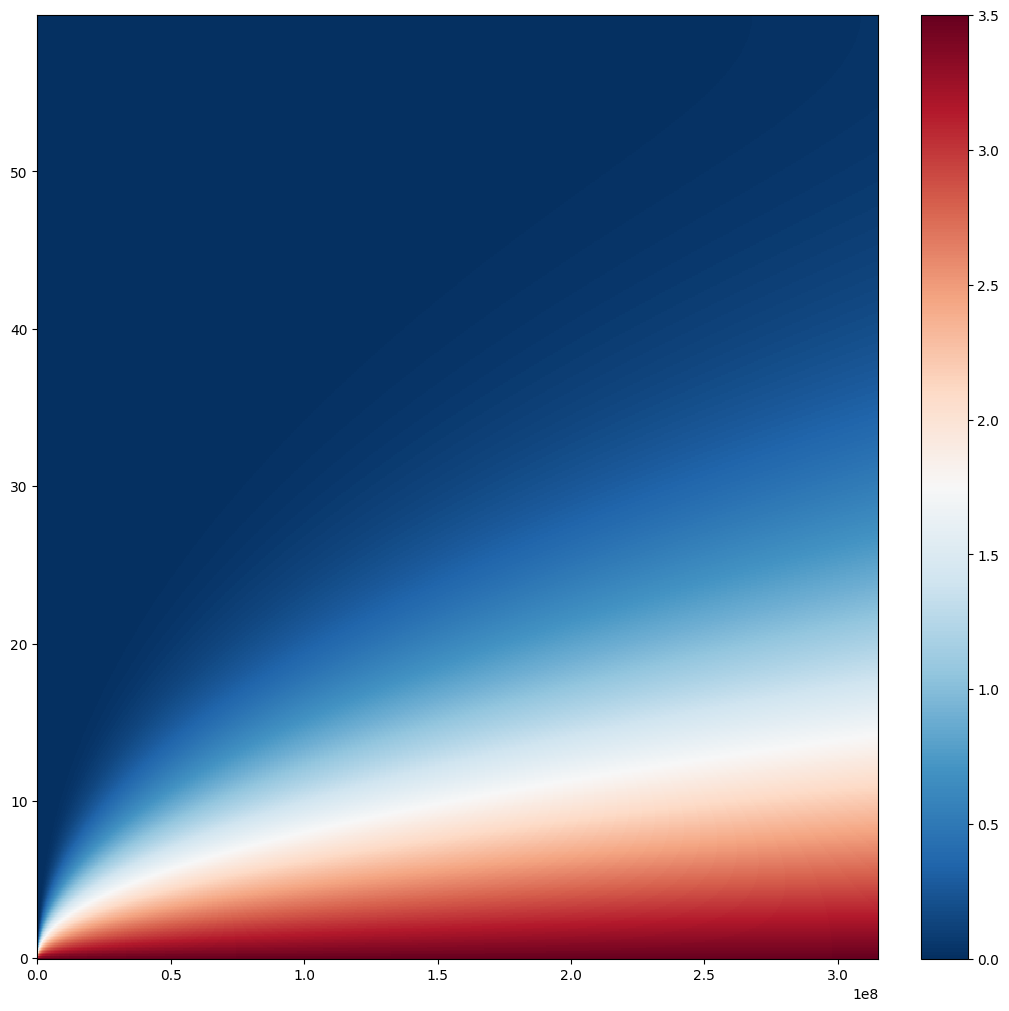

In [5]:
fig, axs = plt.subplots(figsize=(10,10), layout='constrained')
pc = axs.pcolormesh(X, Y, np.clip(u,0,10), cmap='RdBu_r')
fig.colorbar(pc, ax=axs)

## Paper Results

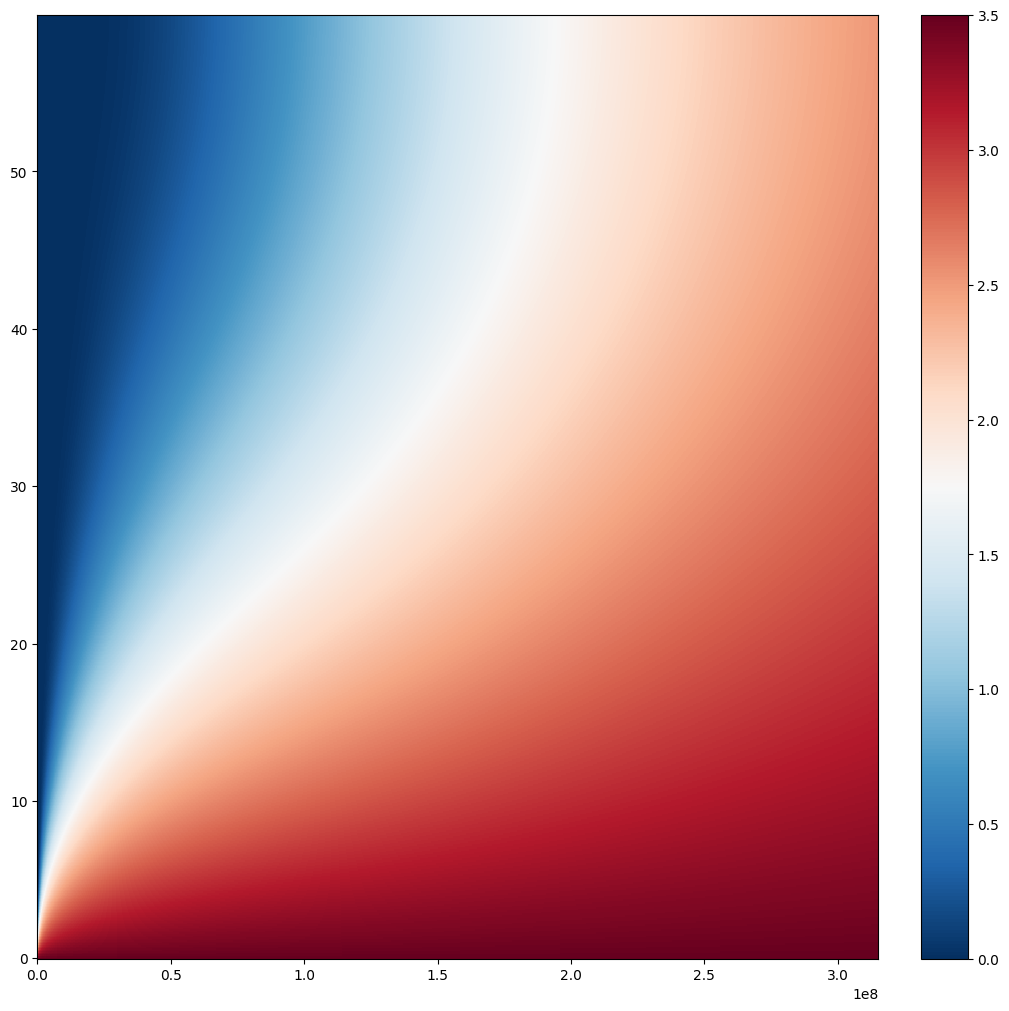

In [ ]:
# k = 0.000007 # paper quoted 7e-7 but used 7e-6
fig, axs = plt.subplots(figsize=(10,10), layout='constrained')
pc = axs.pcolormesh(X, Y, np.clip(u,0,10), cmap='RdBu_r')
fig.colorbar(pc, ax=axs)

## Boundary Condition Plot

In [ ]:
# h = 0.1
# start = -30
# end = 150
# x = np.arange(start,end,h)

# dt = 100000
# st_t = 0
# end_t = 100*365*24*360
# t = np.arange(st_t,end_t,dt)

In [ ]:
def plotter(x, y, labels, title):

    shp = y.shape
    figsize = (11.69, 8.27)
    fig, ax = plt.subplots(figsize=figsize)

    for i in range(len(labels)):
        ax.plot(x, y[i,:], label=labels[i])

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)

    ax.legend()

    return fig

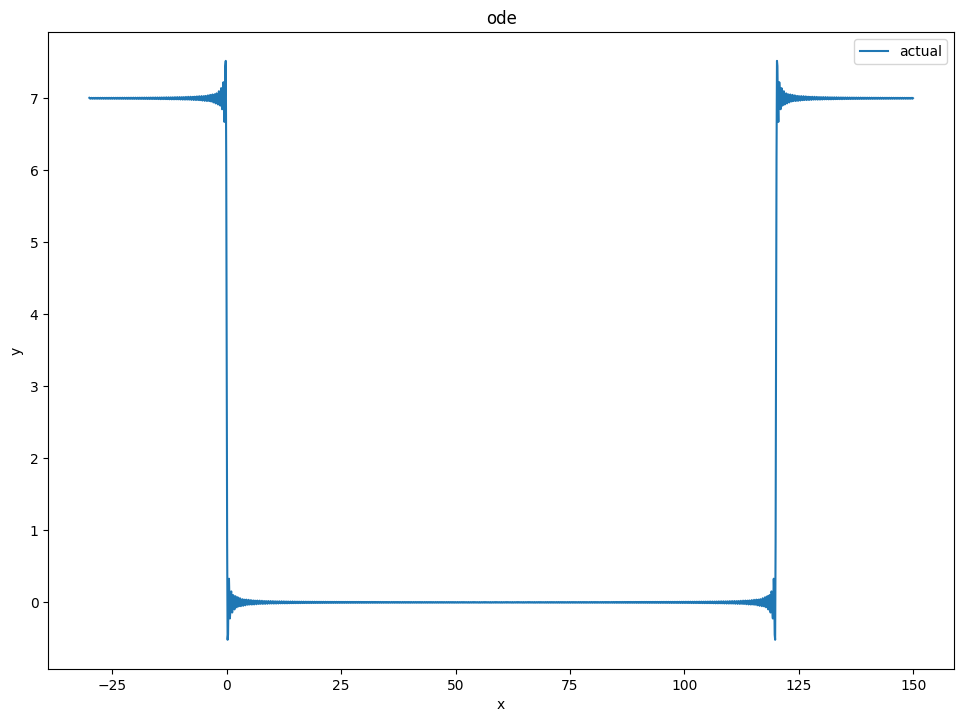

In [ ]:
y = np.zeros((1,x.shape[0]))
y[0,:] = test

labels = ['actual']
title = 'ode'
fig = plotter(x, y, labels, title)